### 两个指数序列的互相关

Compute and plot the cross-correlation of two 16-sample exponential sequences, $x_a=0.8^n$and $x_b=0.92^n$, with $n≥0$.

In [2]:
import numpy as np
from scipy import signal
import sympy
import matplotlib.pyplot as plt

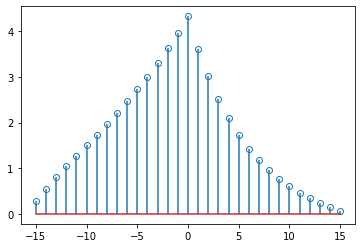

In [3]:
N = 16
n = np.arange(0, N)

a = 0.84
b = 0.92

xa = a**n
xb = b**n

r = signal.correlate(xa,xb)

x = np.arange(-(N-1), N)

fig, axs = plt.subplots()
markerline, stemlines, baseline = axs.stem(
    x, r, markerfmt='o', bottom= 0 )
markerline.set_markerfacecolor('none')
fig.savefig('ab的互相关（用correlate函数）.png',dpi=500)


Determine c analytically to check the correctness of the result. Use a larger sample rate to simulate a continuous situation. The cross-correlation function of the sequences $x_a(n)=a_n$ and $x_b(n)=b_n$for $n≥0$, with $0<a$,$b<1$, is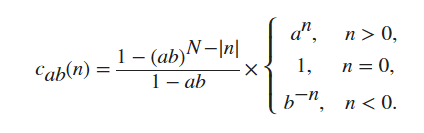

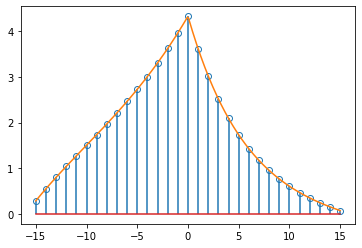

In [4]:
fs = 10;
nn = np.linspace(-(N-1),(N-1),300)
def cab(n):
    i = 0
    cnn = []
    while i<len(n):
        if n[i] > 0:
            cn = (1 - (a*b)**(N-abs(n[i])))/(1 - a*b)*a**n[i]
        if n[i] == 0:
            cn = (1 - (a*b)**(N-abs(n[i])))/(1 - a*b)
        if n[i] < 0:
            cn = (1 - (a*b)**(N-abs(n[i])))/(1 - a*b)*b**(-n[i])
        i = i+1
        cnn = np.append(cnn,cn)
    return cnn

cout = cab(nn)
fig,ax = plt.subplots()
markerline, stemlines, baseline = ax.stem(
    x, r, markerfmt='o', bottom= 0 )
markerline.set_markerfacecolor('none')
ax.plot(nn,cout)
fig.savefig('ab的互相关（用互相关公式推导）.png',dpi=500)

Verify that switching the order of the operands reverses the sequence.

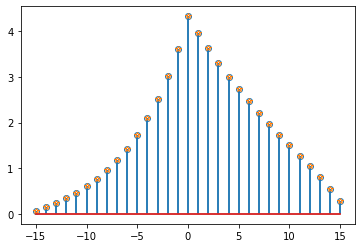

In [18]:
r1 = signal.correlate(xb,xa)
fig,ax1 = plt.subplots()
markerline, stemlines, baseline = ax1.stem(x, r1, markerfmt='o', bottom= 0 )
ax1.set_label('ba')
markerline.set_markerfacecolor('none')


rrev = list(reversed(r))
markerline, stemlines, baseline = ax1.stem(x, rrev, markerfmt='*', bottom= 0 )
ax1.set_label('reversed(ab)')
markerline.set_markerfacecolor('none')

fig.savefig('ba的互相关（用reversed验证）.png',dpi=500)


Generate the 20-sample exponential sequence $x_c=0.77^n$. Compute and plot its cross-correlations with $x_a$ and $x_b$. Output the lags to make the plotting easier. xcorr appends zeros at the end of the shorter sequence to match the length of the longer one.

In [5]:
xc = []
for n in range(0, 20, 1):
    x_ = 0.77**n
    xc = np.append(xc, x_)

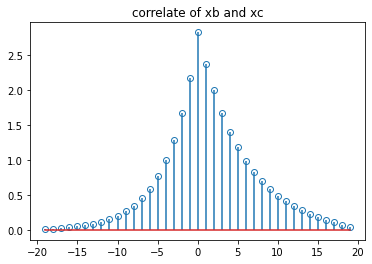

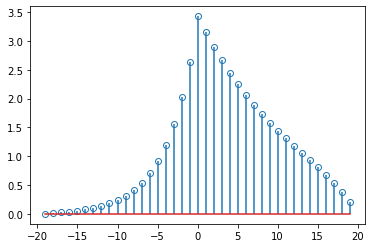

In [6]:

N1 = 20
n1 = np.arange(0, N1)

xa1 = a**n1
xb1 = b**n1

rac = signal.correlate(xa1,xc)
rbc = signal.correlate(xb1,xc)

x1 = np.arange(-(N1-1), N1)
fig,axa = plt.subplots()
markerline, stemlines, baseline = axa.stem(x1, rac, markerfmt='o', bottom= 0 )
markerline.set_markerfacecolor('none')
axa.set_title('correlate of xa and xc')
fig.savefig('ac的互相关.png',dpi=500)

fig, axb = plt.subplots()
markerline, stemlines, baseline = axb.stem(x1, rbc, markerfmt='o', bottom= 0 )
markerline.set_markerfacecolor('none')
axa.set_title('correlate of xb and xc')
fig.savefig('bc的互相关.png',dpi=500)